# 함수

In [18]:
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras import backend as K

precision_metric = Precision()
recall_metric = Recall()

# F1-score 계산 함수
def f1_score(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)
    recall = recall_metric(y_true, y_pred)
    
    # F1-score 계산: 2 * (precision * recall) / (precision + recall)
    return 2 * (precision * recall) / (precision + recall + K.epsilon())

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('spam(k).csv', encoding='utf-8')
X_data = data['v2']
y_data = data['v1']
X_data = [sample if sample == sample else '0' for sample in X_data]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

# 메일 크롤링

In [25]:
from email.header import decode_header # IMAP 이용
import imaplib
import email
import csv

# 메일 제목을 저장할 리스트
subjects = []

while input("ㄱㄱ?: ") != '0':

    # IMAP 서버 정보
    imap_server_input = input("사용할 메일서비스명: ")
    imap_server = f"imap.{imap_server_input}"
    email_user = input("계정 ID: ")
    email_pass = input("password: ")

    # IMAP 서버에 연결
    mail = imaplib.IMAP4_SSL(imap_server, 993)
    mail.login(email_user, email_pass)
    print("로그인 성공!")

    # 받은 편지함 선택
    mail.select("inbox")  # 받은 편지함을 선택
    status, messages = mail.search(None, "ALL")  # 모든 메일
    # status, messages = mail.search(None, "UNSEEN")  # 읽지 않은 메일만 가져오기
    # status, messages = mail.search(None, "RECENT")  # 최근에 받은 메일만 가져오기

    # 메일 ID 추출
    message_ids = messages[0].split()

    # 메일 제목 가져오기
    for index, msg_id in enumerate(message_ids, start=1):
        print(f"{index}/{len(message_ids)} 번째 메일 처리 중...")

        # 메일 가져오기
        status, msg_data = mail.fetch(msg_id, "(RFC822)")

        for response_part in msg_data:
            if isinstance(response_part, tuple):
                # 메일 내용 파싱
                msg = email.message_from_bytes(response_part[1])
                
                # 메일 제목 디코딩
                subject, encoding = decode_header(msg["Subject"])[0]
                if isinstance(subject, bytes):
                    try:
                        if encoding == "cseuckr":
                            subject = subject.decode("euc-kr", errors="ignore")
                        elif encoding == "unknown-8bit":
                            subject = subject.decode("utf-8", errors="ignore")
                        else:
                            subject = subject.decode(encoding if encoding else "utf-8")
                    except (UnicodeDecodeError, TypeError):
                        subject = subject.decode("utf-8", errors="ignore")

                # 제목을 리스트에 추가
                subjects.append(subject)

# CSV 파일로 저장
with open('spam(K).csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    for subject in subjects:
        writer.writerow([0, subject])

# 결과 확인
print("메일 제목 리스트를 'spam(K).csv'에 저장했습니다.")

# IMAP 서버에서 로그아웃
mail.close()
mail.logout()


로그인 성공!
1/970 번째 메일 처리 중...
2/970 번째 메일 처리 중...
3/970 번째 메일 처리 중...
4/970 번째 메일 처리 중...
5/970 번째 메일 처리 중...
6/970 번째 메일 처리 중...
7/970 번째 메일 처리 중...
8/970 번째 메일 처리 중...
9/970 번째 메일 처리 중...
10/970 번째 메일 처리 중...
11/970 번째 메일 처리 중...
12/970 번째 메일 처리 중...
13/970 번째 메일 처리 중...
14/970 번째 메일 처리 중...
15/970 번째 메일 처리 중...
16/970 번째 메일 처리 중...
17/970 번째 메일 처리 중...
18/970 번째 메일 처리 중...
19/970 번째 메일 처리 중...
20/970 번째 메일 처리 중...
21/970 번째 메일 처리 중...
22/970 번째 메일 처리 중...
23/970 번째 메일 처리 중...
24/970 번째 메일 처리 중...
25/970 번째 메일 처리 중...
26/970 번째 메일 처리 중...
27/970 번째 메일 처리 중...
28/970 번째 메일 처리 중...
29/970 번째 메일 처리 중...
30/970 번째 메일 처리 중...
31/970 번째 메일 처리 중...
32/970 번째 메일 처리 중...
33/970 번째 메일 처리 중...
34/970 번째 메일 처리 중...
35/970 번째 메일 처리 중...
36/970 번째 메일 처리 중...
37/970 번째 메일 처리 중...
38/970 번째 메일 처리 중...
39/970 번째 메일 처리 중...
40/970 번째 메일 처리 중...
41/970 번째 메일 처리 중...
42/970 번째 메일 처리 중...
43/970 번째 메일 처리 중...
44/970 번째 메일 처리 중...
45/970 번째 메일 처리 중...
46/970 번째 메일 처리 중...
47/970 번째 메일 처리 중...
48/970 번째 메일 처

('BYE', [b'Logging out'])

# 데이터 준비

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def Info(DataFrame):
    DataFrame.info()
    print("---------------------------------- ")
    print('Null 여부 :', DataFrame.isnull().values.any())
    print('중복값 :', len(DataFrame) - DataFrame['body'].nunique())
    DataFrame.drop_duplicates(subset=['body'], inplace=True)
    print('삭제 후 샘플 수 :',len(DataFrame))
    print("---------------------------------- ")
    print(DataFrame.groupby('head').size().reset_index(name='count'))

def Incoding():
    print("인코딩 결과 : ", word_to_index)
    print("등장횟수 : ", tokenizer.word_counts.items())

    one = 2
    total_cnt = len(word_to_index) # 단어의 수
    rare_cnt = 0 # 등장 빈도수가 one보다 작은 단어의 개수를 카운트
    total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
    rare_freq = 0 # 등장 빈도수가 one보다 작은 단어의 등장 빈도수의 총 합

    # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
    for key, value in tokenizer.word_counts.items():
        total_freq = total_freq + value

        # 단어의 등장 빈도수가 one보다 작으면
        if(value < one):
            rare_cnt = rare_cnt + 1
            rare_freq = rare_freq + value

    print('메일의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
    print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
    print('등장 빈도가 %s번 이하인 단어의 수: %s'%(one - 1, rare_cnt))
    print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
    print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [3]:
try:
    with open('spam(K).csv', 'r', encoding='euc-kr') as infile:
        content = infile.read()

    with open('spam(k).csv', 'w', encoding='utf-8') as outfile:
        outfile.write(content)

except Exception as e:
    print(f"Error occurred: {e}")
    # 에러가 발생하면 해당 파일을 스킵하고, 프로그램을 계속 진행

Error occurred: 'euc_kr' codec can't decode byte 0x84 in position 22: illegal multibyte sequence


In [4]:
data = pd.read_csv('spam(k).csv', encoding='utf-8')
print('총 샘플의 수 :',len(data))
data.columns = ['head', 'body']
data[:5]

총 샘플의 수 : 1830


,head,body
0,1,[EvryPlay] 계정을 인증해주세요.
1,0,주말은 Google Play와 함께
2,0,"주말은 Google Play, Chromecast와 함께!"
3,0,주말은 구글플레이와 함께! 도서 세트 할인!
4,0,"2014 브라질 월드컵, 뜨겁게 즐기자!"


In [5]:
Info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   head    1830 non-null   int64 
 1   body    1828 non-null   object
dtypes: int64(1), object(1)
memory usage: 28.7+ KB
---------------------------------- 
Null 여부 : True
중복값 : 593
삭제 후 샘플 수 : 1238
---------------------------------- 
   head  count
0     0    907
1     1    331


<Figure size 1000x1000 with 0 Axes>

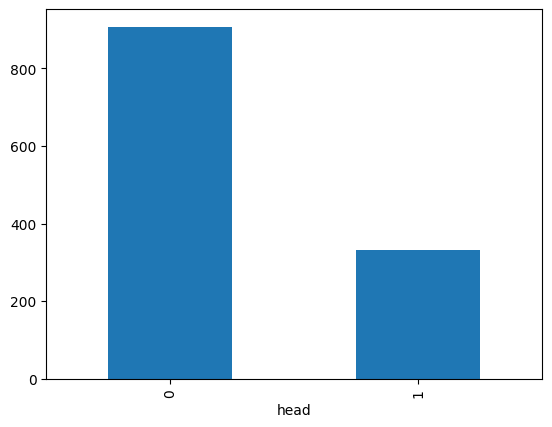

<Figure size 1000x1000 with 0 Axes>

In [6]:
data['head'].value_counts().plot(kind='bar')
plt.figure(figsize=(10, 10))

In [7]:
X_data = data['body']
y_data = data['head']
X_data = [sample if sample == sample else '0' for sample in X_data]
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
word_to_index = tokenizer.word_index
Incoding()

인코딩 결과 :  {'광고': 1, '안내': 2, '컬쳐랜드': 3, '개인정보': 4, '갤럭시': 5, 'google': 6, '문화상품권': 7, 'play': 8, '주문': 9, '혜택': 10, '영수증': 11, '이용약관': 12, '개정': 13, '이용내역': 14, '2021': 15, '계정': 16, 'to': 17, 'your': 18, '이벤트': 19, '및': 20, '지금': 21, '변경': 22, '보세요': 23, '새로운': 24, 'and': 25, '알바': 26, '받으세요': 27, '드립니다': 28, '최대': 29, 'circleci': 30, 'for': 31, '약관': 32, '서비스': 33, 'github': 34, '업데이트': 35, '할인': 36, '안내드립니다': 37, '내역': 38, '지급': 39, '받아가세요': 40, '2': 41, 'newsletter': 42, "'": 43, 'ci': 44, 'galaxy': 45, '만나보세요': 46, '알바천국': 47, '데스런': 48, '로그인': 49, '있는': 50, '이용': 51, 'cd': 52, '캠퍼스': 53, 'ip': 54, '11': 55, 'mega': 56, '3': 57, '수': 58, '함께': 59, 'webinar': 60, '2022': 61, '네이버': 62, '증정': 63, '방법': 64, '이용내역을': 65, '환영합니다': 66, '사전': 67, '문화상품권으로': 68, 'the': 69, 'repl': 70, 'it': 71, '6': 72, '월간': 73, '정보': 74, 'on': 75, 'new': 76, '100': 77, '스토어': 78, '·': 79, '원스토어': 80, '굽자님의': 81, '10': 82, '컬쳐캐쉬': 83, 'of': 84, '알림': 85, '한국발명진흥회': 86, 'in': 87, '양은석': 88, '수집': 89, '출처'

In [9]:
# 1회 단어 제외
#tokenizer = Tokenizer(num_words = total_cnt - rare_cnt + 1)
vocab_size = len(word_to_index) + 1
max_len = max(len(sample) for sample in X_train_encoded)
lengths = [len(sample) for sample in X_data if isinstance(sample, str)]

단어 집합의 크기: 2659


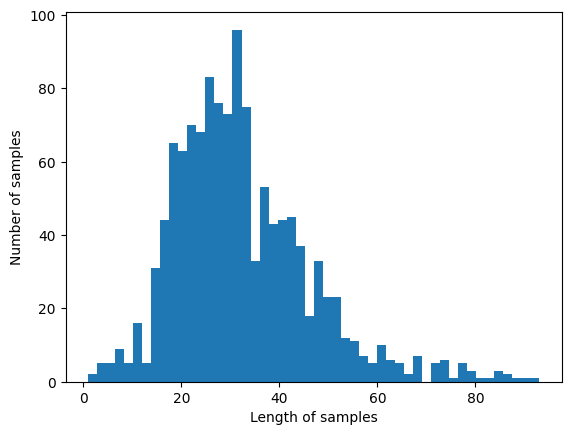

In [10]:
print('단어 집합의 크기: {}'.format((vocab_size)))
plt.hist(lengths, bins=50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.show()

In [11]:
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (990, 19)


# Tokenizer + CNN

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
word_to_index = tokenizer.word_index

vocab_size = len(word_to_index) + 1
max_len = max(len(sample) for sample in X_train_encoded)
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)

In [11]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

embedding_dim = 64
dropout_ratio = 0.3
num_filters = 128
kernel_size = 5

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(dropout_ratio))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(dropout_ratio))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(dropout_ratio))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(dropout_ratio))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=[f1_score])

# EarlyStopping 및 ModelCheckpoint 설정
es = EarlyStopping(monitor='val_f1_score', mode='max', verbose=1, patience=15)
mc = ModelCheckpoint('best_model_TKCNN.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit(X_train_padded, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/100
15/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.3034 - loss: 4.9265
Epoch 1: val_loss improved from inf to 3.39602, saving model to best_model_TKCNN.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - f1_score: 0.2791 - loss: 4.7821 - val_f1_score: 0.0932 - val_loss: 3.3960
Epoch 2/100
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.0750 - loss: 3.0934
Epoch 2: val_loss improved from 3.39602 to 2.26657, saving model to best_model_TKCNN.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.0741 - loss: 3.0686 - val_f1_score: 0.0489 - val_loss: 2.2666
Epoch 3/100
14/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.0436 - loss: 2.1105
Epoch 3: val_loss improved from 2.26657 to 1.48261, saving model to best_model_TKCNN.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.0426 - loss: 2.0443 - val_f1_score: 0.0332 - val_loss: 1.4826
Epoch 4/100
13/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.0474 - loss: 1.3540
Epoch 4: val_loss improved from 1.48261 to 

In [12]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
loss_TK_CNN, f1_TK_CNN = model.evaluate(X_test_padded, y_test)
print("\n 테스트 손실값: %.4f, 점수: %.4f" % (loss_TK_CNN, f1_TK_CNN))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.9324 - loss: 0.4034 

 테스트 손실값: 0.4185, 점수: 0.9324


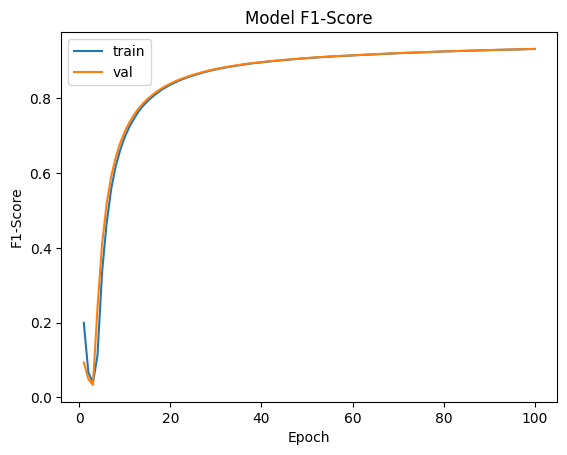

In [13]:
epochs = range(1, len(history.history['f1_score']) + 1)
plt.plot(epochs, history.history['f1_score'])
plt.plot(epochs, history.history['val_f1_score'])
plt.title('Model F1-Score')
plt.ylabel('F1-Score')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
import keras_tuner as kt
import os


# 모델을 빌드하는 함수 정의
def build_model(hp):
    model = Sequential()
    model.add(Embedding(vocab_size, hp.Int('embedding_dim', min_value=16, max_value=128, step=16)))
    model.add(Dropout(hp.Float('dropout_ratio', min_value=0.2, max_value=0.5, step=0.1)))

    # CNN 층
    model.add(Conv1D(filters=hp.Int('num_filters', min_value=32, max_value=128, step=32),
                     kernel_size=hp.Int('kernel_size', min_value=3, max_value=7, step=1),
                     padding='valid', activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(hp.Float('dropout_ratio', min_value=0.2, max_value=0.5, step=0.1)))

    # Dense 층
    for i in range(hp.Int('num_dense_layers', 1, 4)):
        model.add(Dense(units=hp.Int(f'dense_units_{i}', min_value=64, max_value=256, step=64),
                        activation='relu',
                        kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dropout(hp.Float('dropout_ratio', min_value=0.2, max_value=0.5, step=0.1)))

    # 출력층
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='binary_crossentropy', metrics=[f1_score])
    batch_size = hp.Int('batch_size', min_value=32, max_value=128, step=32)
    return model


# 하이퍼파라미터 튜너 설정
tuner = kt.Hyperband(build_model,
                     objective='val_f1_score',
                     max_epochs=10,
                     factor=3,
                     directory='C:\keras_tuner',
                     project_name='TK_CNN_c6')

# EarlyStopping 및 ModelCheckpoint 설정
es = EarlyStopping(monitor='val_f1_score', mode='max', verbose=1, patience=15)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# 모델 학습
tuner.search(X_train_padded, y_train, epochs=10, validation_split=0.2, callbacks=[es, mc])

# 최적의 하이퍼파라미터와 모델 정보 출력
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
for param, value in best_hp.values.items():
    print(f"{param}: {value}")

Trial 30 Complete [00h 00m 06s]
val_f1_score: 0.6753152012825012

Best val_f1_score So Far: 0.6598064303398132
Total elapsed time: 00h 02m 17s
Best hyperparameters:
embedding_dim: 64
dropout_ratio: 0.30000000000000004
num_filters: 128
kernel_size: 5
num_dense_layers: 4
dense_units_0: 128
optimizer: adam
batch_size: 96
dense_units_1: 256
dense_units_2: 64
dense_units_3: 128
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0011


# TF-IDF + CNN

In [20]:
# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# TF-IDF 데이터를 Conv1D에 맞는 3D 배열로 변환
X_train_tfidf = X_train_tfidf.reshape(X_train_tfidf.shape[0], X_train_tfidf.shape[1], 1)
X_test_tfidf = X_test_tfidf.reshape(X_test_tfidf.shape[0], X_test_tfidf.shape[1], 1)

In [21]:
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

# 모델 정의
num_filters = 64
kernel_size = 5
dropout_ratio = 0.4

model = Sequential()
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu', input_shape=(X_train_tfidf.shape[1], 1)))
model.add(GlobalMaxPooling1D())
model.add(Dropout(dropout_ratio))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(dropout_ratio))
model.add(Dense(192, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(dropout_ratio))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(dropout_ratio))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=[f1_score])

# EarlyStopping 및 ModelCheckpoint 설정
es = EarlyStopping(monitor='val_f1_score', mode='max', verbose=1, patience=5)
mc = ModelCheckpoint('best_model_TFCNN.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# 모델 학습
history = model.fit(X_train_tfidf, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[es, mc])

c:\Users\양은석\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - f1_score: 0.1395 - loss: 4.5624
Epoch 1: val_loss improved from inf to 3.72651, saving model to best_model_TFCNN.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - f1_score: 0.1293 - loss: 4.5139 - val_f1_score: 0.0291 - val_loss: 3.7265
Epoch 2/100
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - f1_score: 0.0229 - loss: 3.5715
Epoch 2: val_loss improved from 3.72651 to 3.10314, saving model to best_model_TFCNN.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - f1_score: 0.0223 - loss: 3.5480 - val_f1_score: 0.0145 - val_loss: 3.1031
Epoch 3/100
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - f1_score: 0.0127 - loss: 2.9820
Epoch 3: val_loss improved from 3.10314 to 2.61777, saving model to best_model_TFCNN.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - f1_score: 0.0125 - loss: 2.9634 - val_f1_score: 0.0097 - val_loss: 2.6178
Epoch 4/100
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - f1_score: 0.0088 - loss: 2.5139
Epoch 4: val_loss improved from 

In [22]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
loss_TF_CNN, f1_TF_CNN = model.evaluate(X_test_tfidf, y_test)
print("\n 테스트 손실값: %.4f, f1점수: %.4f" % (loss_TF_CNN, f1_TF_CNN))

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - f1_score: 0.0047 - loss: 1.5639

 테스트 손실값: 1.5775, f1점수: 0.0047


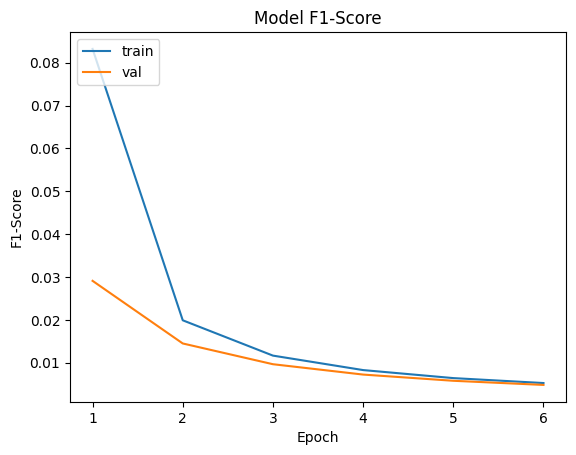

In [23]:
epochs = range(1, len(history.history['f1_score']) + 1)
plt.plot(epochs, history.history['f1_score'])
plt.plot(epochs, history.history['val_f1_score'])
plt.title('Model F1-Score')
plt.ylabel('F1-Score')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [71]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
import keras_tuner as kt
import os

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()
X_train_tfidf = X_train_tfidf.reshape(X_train_tfidf.shape[0], X_train_tfidf.shape[1], 1)
X_test_tfidf = X_test_tfidf.reshape(X_test_tfidf.shape[0], X_test_tfidf.shape[1], 1)

# 모델을 빌드하는 함수 정의
def build_model(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('num_filters', min_value=32, max_value=128, step=32),
                     kernel_size=hp.Int('kernel_size', min_value=3, max_value=7, step=1),
                     activation='relu', input_shape=(X_train_tfidf.shape[1], 1)))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(hp.Float('dropout_ratio', min_value=0.2, max_value=0.5, step=0.1)))

    # Dense 층
    for i in range(hp.Int('num_dense_layers', 3, 4)):
        model.add(Dense(units=hp.Int(f'dense_units_{i}', min_value=64, max_value=256, step=64),
                        activation='relu',
                        kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dropout(hp.Float('dropout_ratio', min_value=0.2, max_value=0.5, step=0.1)))

    # 출력층
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='binary_crossentropy', metrics=[f1_score])
    batch_size = hp.Int('batch_size', min_value=32, max_value=128, step=32)
    return model



# 하이퍼파라미터 튜너 설정
tuner = kt.Hyperband(build_model,
                     objective='val_f1_score',
                     max_epochs=10,
                     factor=2,
                     directory='C:\keras_tuner',
                     project_name='TF_Den_c5')

# EarlyStopping 및 ModelCheckpoint 설정
es = EarlyStopping(monitor='val_f1_score', mode='max', verbose=1, patience=15)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# 모델 학습
tuner.search(X_train_tfidf, y_train, epochs=10, validation_split=0.2, callbacks=[es, mc])

# 최적의 하이퍼파라미터와 모델 정보 출력
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
for param, value in best_hp.values.items():
    print(f"{param}: {value}")

Trial 30 Complete [00h 00m 19s]
val_f1_score: 0.0398867204785347

Best val_f1_score So Far: 0.0398867204785347
Total elapsed time: 00h 05m 39s
Best hyperparameters:
num_filters: 64
kernel_size: 5
dropout_ratio: 0.4
num_dense_layers: 4
dense_units_0: 128
dense_units_1: 192
dense_units_2: 64
optimizer: rmsprop
batch_size: 128
dense_units_3: 128
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0


# Tokenizer + RNN

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
word_to_index = tokenizer.word_index

vocab_size = len(word_to_index) + 1
max_len = max(len(sample) for sample in X_train_encoded)
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)

In [4]:
import json

# Tokenizer를 json 형식으로 저장
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w') as f:
    json.dump(tokenizer_json, f)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

embedding_dim = 64
dropout_ratio = 0.3
units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Dropout(dropout_ratio))
model.add(LSTM(units, return_sequences=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(dropout_ratio))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(dropout_ratio))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=[f1_score])

# EarlyStopping 및 ModelCheckpoint 설정
es = EarlyStopping(monitor='val_f1_score', mode='max', verbose=1, patience=15)
mc = ModelCheckpoint('best_model_TKRNN.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit(X_train_padded, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[es, mc])


Epoch 1/100


c:\Users\양은석\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.2362 - loss: 2.7205
Epoch 1: val_loss improved from inf to 1.93314, saving model to best_model_TKRNN.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - f1_score: 0.2269 - loss: 2.6912 - val_f1_score: 0.0530 - val_loss: 1.9331
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.0413 - loss: 1.7712
Epoch 2: val_loss improved from 1.93314 to 1.38853, saving model to best_model_TKRNN.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - f1_score: 0.0411 - loss: 1.7652 - val_f1_score: 0.0267 - val_loss: 1.3885
Epoch 3/100
16/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.0283 - loss: 1.2909
Epoch 3: val_loss improved from 1.38853 to 0.96945, saving model to best_model_TKRNN.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - f1_score: 0.0315 - loss: 1.2727 - val_f1_score: 0.0961 - val_loss: 0.9695
Epoch 4/100
16/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.1215 - loss: 0.9307
Epoch 4: val_loss improved from 0.96945 to 0.70882,

In [36]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
loss_TK_RNN, f1_TK_RNN = model.evaluate(X_test_padded, y_test)
print("\n 테스트 손실값: %.4f, 점수: %.4f" % (loss_TK_RNN, f1_TK_RNN))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.9293 - loss: 0.2224

 테스트 손실값: 0.2595, 점수: 0.9292


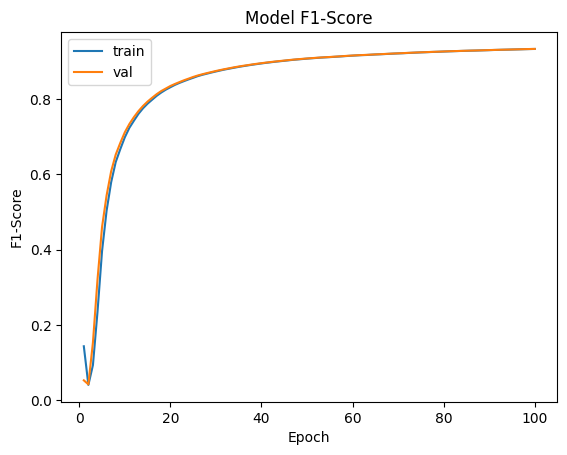

In [12]:
epochs = range(1, len(history.history['f1_score']) + 1)
plt.plot(epochs, history.history['f1_score'])
plt.plot(epochs, history.history['val_f1_score'])
plt.title('Model F1-Score')
plt.ylabel('F1-Score')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [67]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Embedding, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
import keras_tuner as kt
import os


# 모델을 빌드하는 함수 정의
def build_model(hp):
    model = Sequential()
    embedding_dim = hp.Int('embedding_dim', min_value=32, max_value=128, step=32)
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
    lstm_dropout = hp.Float('lstm_dropout', min_value=0.2, max_value=0.5, step=0.1)
    model.add(Dropout(lstm_dropout))

    # LSTM 층
    units = hp.Int('units', min_value=64, max_value=256, step=64)
    model.add(LSTM(units, return_sequences=False, kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(lstm_dropout))

    # Dense 층 및 Dropout
    dense_dropout = hp.Float('dense_dropout', min_value=0.2, max_value=0.5, step=0.1)
    num_dense_layers = hp.Int('num_dense_layers', 1, 4)
    for i in range(num_dense_layers):
        model.add(Dense(units=hp.Int(f'dense_units_{i}', min_value=64, max_value=256, step=64),
                        activation='relu',
                        kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dropout(dense_dropout))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='binary_crossentropy', metrics=[f1_score])
    
    batch_size = hp.Int('batch_size', min_value=32, max_value=128, step=32)
    return model

# 하이퍼파라미터 튜너 설정 (Hyperband)
tuner = kt.Hyperband(
    build_model,
    objective='val_f1_score',
    max_epochs=100,
    factor=3,
    directory='C:\keras_tuner',
    project_name='TK_RNN_c7'
)

# EarlyStopping 및 ModelCheckpoint 설정
es = EarlyStopping(monitor='val_f1_score', mode='max', verbose=1, patience=15)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# 모델 학습
tuner.search(X_train_padded, y_train, epochs=100, validation_split=0.2, callbacks=[es, mc])

# 최적의 하이퍼파라미터와 모델 정보 출력
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
for param, value in best_hp.values.items():
    print(f"{param}: {value}")


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
64                |64                |embedding_dim
0.2               |0.2               |lstm_dropout
64                |64                |units
0.3               |0.3               |dense_dropout
1                 |1                 |num_dense_layers
64                |64                |dense_units_0
rmsprop           |rmsprop           |optimizer
96                |96                |batch_size

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - f1_score: 0.9213 - loss: 1.9708 - val_f1_score: 0.9180 - val_loss: 1.3346
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - f1_score: 0.9166 - loss: 1.1881 - val_f1_score: 0.9137 - val_loss: 0.8528
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - f1_score: 0.9126 - loss: 0.7779 - val_f1_score: 0.9113 - val_loss: 0.5600
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - f1_score: 0.9110 - loss: 0.5017 - val_f1_score: 0.9104 - val_loss: 0.4185
Epoc

KeyboardInterrupt: 

In [80]:
from tensorflow.keras.layers import Embedding, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
import keras_tuner as kt
import os


# 모델을 빌드하는 함수 정의
def build_model(hp):
    model = Sequential()
    embedding_dim = hp.Int('embedding_dim', min_value=32, max_value=128, step=32)
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
    lstm_dropout = hp.Float('lstm_dropout', min_value=0.2, max_value=0.5, step=0.1)
    model.add(Dropout(lstm_dropout))

    # LSTM 층
    units = hp.Int('units', min_value=64, max_value=256, step=64)
    model.add(LSTM(units, return_sequences=False, kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(lstm_dropout))

    # Dense 층 및 Dropout
    dense_dropout = hp.Float('dense_dropout', min_value=0.2, max_value=0.5, step=0.1)
    model.add(Dense(units=hp.Int(f'dense_units_1', min_value=64, max_value=256, step=64),
                        activation='relu',
                        kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(dense_dropout))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='binary_crossentropy', metrics=[f1_score])
    
    batch_size = hp.Int('batch_size', min_value=32, max_value=128, step=32)
    return model

# 하이퍼파라미터 튜너 설정 (BayesianOptimization)
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_f1_score',
    max_trials=30,
    executions_per_trial=1,
    directory='C:\keras_tuner',
    project_name='TK_RNN_c9'
)

# EarlyStopping 및 ModelCheckpoint 설정
es = EarlyStopping(monitor='val_f1_score', mode='max', verbose=1, patience=15)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# 모델 학습
tuner.search(X_train_padded, y_train, epochs=100, validation_split=0.2, callbacks=[es, mc])

# 최적의 하이퍼파라미터와 모델 정보 출력
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
for param, value in best_hp.values.items():
    print(f"{param}: {value}")

Trial 30 Complete [00h 00m 15s]
val_f1_score: 0.8664000630378723

Best val_f1_score So Far: 0.8652507066726685
Total elapsed time: 00h 08m 39s
Best hyperparameters:
embedding_dim: 128
lstm_dropout: 0.2
units: 64
dense_dropout: 0.4
dense_units_1: 128
optimizer: adam
batch_size: 96


c:\Users\양은석\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# TF-IDF + RNN

In [17]:
# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# TF-IDF 데이터를 LSTM에 맞는 3D 배열로 변환
X_train_tfidf = X_train_tfidf.reshape(X_train_tfidf.shape[0], X_train_tfidf.shape[1], 1)
X_test_tfidf = X_test_tfidf.reshape(X_test_tfidf.shape[0], X_test_tfidf.shape[1], 1)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

# 모델 정의
num_units = 32
dropout_ratio = 0.4

model = Sequential()
model.add(GRU(num_units, return_sequences=False, input_shape=(X_train_tfidf.shape[1], 1)))
model.add(Dropout(dropout_ratio))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=[f1_score])

# EarlyStopping 및 ModelCheckpoint 설정
es = EarlyStopping(monitor='val_f1_score', mode='max', verbose=1, patience=3)
mc = ModelCheckpoint('best_model_TFRNN.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# 모델 학습
history = model.fit(X_train_tfidf, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[es, mc])

Epoch 1/100


c:\Users\양은석\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - f1_score: 0.0493 - loss: 1.0340
Epoch 1: val_loss improved from inf to 0.89904, saving model to best_model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 33s 823ms/step - f1_score: 0.0486 - loss: 1.0326 - val_f1_score: 0.0045 - val_loss: 0.8990
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 737ms/step - f1_score: 0.0034 - loss: 0.8619
Epoch 2: val_loss improved from 0.89904 to 0.80285, saving model to best_model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 29s 785ms/step - f1_score: 0.0034 - loss: 0.8611 - val_f1_score: 0.0022 - val_loss: 0.8029
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 744ms/step - f1_score: 0.0019 - loss: 0.7587
Epoch 3: val_loss improved from 0.80285 to 0.73946, saving model to best_model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 29s 792ms/step - f1_score: 0.0019 - loss: 0.7585 - val_f1_score: 0.0014 - val_loss: 0.7395
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/step - f1_score: 0.0013 - loss: 0.7173
Epoch 4: val_loss improved from 0.73946 to 0.69971, saving 

In [21]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
loss_TF_RNN, f1_TF_RNN = model.evaluate(X_test_tfidf, y_test)
print("\n 테스트 손실값: %.4f, f1점수: %.4f" % (loss_TF_RNN, f1_TF_RNN))

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - f1_score: 9.5406e-04 - loss: 0.6675

 테스트 손실값: 0.6819, f1점수: 0.0009


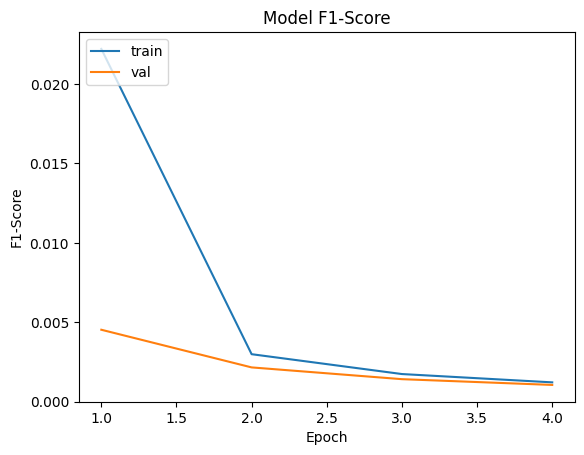

In [22]:
epochs = range(1, len(history.history['f1_score']) + 1)
plt.plot(epochs, history.history['f1_score'])
plt.plot(epochs, history.history['val_f1_score'])
plt.title('Model F1-Score')
plt.ylabel('F1-Score')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
import keras_tuner as kt
import os

# 모델을 빌드하는 함수 정의
def build_model(hp):
    model = Sequential()
    model.add(GRU(
        hp.Int('num_units', min_value=32, max_value=128, step=32), 
        return_sequences=False, 
        input_shape=(X_train_tfidf.shape[1], 1)
    ))
    model.add(Dropout(hp.Float('dropout_ratio', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Dense 층
    model.add(Dense(
        hp.Int('dense_units', min_value=64, max_value=256, step=64), 
        activation='relu', 
        kernel_regularizer=regularizers.l2(0.01)
    ))
    model.add(Dropout(hp.Float('dropout_ratio', min_value=0.2, max_value=0.5, step=0.1)))

    # 출력층
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='binary_crossentropy', metrics=[f1_score])
    batch_size = hp.Int('batch_size', min_value=32, max_value=128, step=32)
    return model



# 하이퍼파라미터 튜너 설정
tuner = kt.Hyperband(build_model,
                     objective='val_f1_score',
                     max_epochs=10,
                     factor=3,
                     directory='C:\keras_tuner',
                     project_name='TF_RNN_c1')

# EarlyStopping 콜백 정의
es = EarlyStopping(monitor='val_loss', mode='min', patience=3)
mc = ModelCheckpoint('best_model.keras', monitor='f1_score', mode='max', verbose=1, save_best_only=True)


# 모델 학습
tuner.search(X_train_tfidf, y_train, epochs=10, validation_split=0.2, callbacks=[es])

# 최적의 하이퍼파라미터와 모델 정보 출력
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
for param, value in best_hp.values.items():
    print(f"{param}: {value}")

Trial 30 Complete [00h 08m 41s]
val_f1_score: 0.0008955238154157996

Best val_f1_score So Far: 0.0008595056715421379
Total elapsed time: 01h 41m 59s
Best hyperparameters:
num_units: 64
dropout_ratio: 0.30000000000000004
dense_units: 128
optimizer: adam
batch_size: 64
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0


# TF-IDF + Naive Bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model = MultinomialNB(alpha=0.1, fit_prior=True)
model.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
alpha_values = [0.01, 0.1, 0.5, 1.0, 10.0]
for alpha in alpha_values:
    model = MultinomialNB(alpha=alpha, fit_prior=True)
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    f1 = f1_score(y_test, y_pred)
    print(f"Alpha: {alpha}, F1-score: {f1}")

Alpha: 0.01, F1-score: 0.8991596638655462, loss: 0.21605626237679926
Alpha: 0.1, F1-score: 0.8925619834710744, loss: 0.21605626237679926
Alpha: 0.5, F1-score: 0.8879668049792531, loss: 0.21605626237679926
Alpha: 1.0, F1-score: 0.8870292887029289, loss: 0.21605626237679926
Alpha: 10.0, F1-score: 0.6979166666666666, loss: 0.21605626237679926


In [9]:
from sklearn.metrics import f1_score, log_loss

y_pred = model.predict(X_test_tfidf)
y_pred_proba = model.predict_proba(X_test_tfidf)

f1_TF_NB = f1_score(y_test, y_pred)
loss_TF_NB = log_loss(y_test, y_pred_proba)
print("\n 테스트 손실값: %.4f, f1 점수: %.4f" % (loss_TF_NB, f1_TF_NB))


 테스트 손실값: 0.2161, f1 점수: 0.8926


In [ ]:
import joblib

joblib.dump(model, 'best_model_TFNB.pkl')
joblib.dump(tfidf_vectorizer, 'best_model_TFNB_vectorizer.pkl')

# FastText

In [ ]:
from sklearn.metrics import f1_score
import fasttext

# FastText 학습을 위한 파일로 변환
with open("train.txt", "w") as f:
    for text, label in zip(X_train, y_train):
        f.write(f'__label__{label} {text}\n')

# FastText 모델 학습
model = fasttext.train_supervised(input="train.txt", lr=0.1, epoch=100, wordNgrams=2, dim=200, minCount=5, verbose=2)

# 학습된 모델로 예측 수행
y_pred = []
for text in X_test:
    cleaned_text = text.strip().replace("\n", "")
    predicted_label = model.predict(cleaned_text)[0][0].replace("__label__", "")
    y_pred.append(predicted_label)

# f1_score 계산
y_test = [str(label) for label in y_test]
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

In [ ]:
model.save_model("best_model_FT.bin")

# TF-IDF + Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(
    max_features=2000,
    ngram_range=(1, 2),
    stop_words='english',
    min_df=1
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Logistic Regression 모델 학습
model = LogisticRegression(
    C=10,
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    random_state=0
)
model.fit(X_train_tfidf, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=0, solver='liblinear')

In [5]:
# 예측
y_pred = model.predict(X_test_tfidf)

In [ ]:
# f1_score 계산
f1_TF_LR = f1_score(y_test, y_pred)
print(f"F1 Score: {f1_TF_LR}")

F1 Score: 0.9270384907722473


In [ ]:
import joblib
joblib.dump(model, 'best_model_TFLR.pkl')

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

# TfidfVectorizer와 LogisticRegression을 결합한 파이프라인
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression(max_iter=1000, random_state=0))
])

# TfidfVectorizer 하이퍼파라미터 그리드
tfidf_params = {
    'tfidf__max_features': [2000, 5000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf__stop_words': [None, 'english'],
    'tfidf__min_df': [1, 5],
}

# LogisticRegression 하이퍼파라미터 그리드
lr_params = {
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l2'],
    'lr__solver': ['liblinear', 'saga'],
}

# GridSearchCV
param_grid = {**tfidf_params, **lr_params}
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1')

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터와 성능 확인
print(f"Best parameters: {grid_search.best_params_}")

# 예측 및 F1 Score 계산
y_pred = grid_search.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

Best parameters: {'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'liblinear', 'tfidf__max_features': 2000, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': 'english'}
F1 Score: 0.927038626609442


# 결과

f1_TK_CNN = 0.9324  
f1_TF_CNN = 0.0047

f1_TK_RNN = 0.9330  
f1_TF_RNN = 0.0009

f1_TF_NB =  0.8926  
f1_FT    =  0.9363  
f1_TF_LR =  0.9270

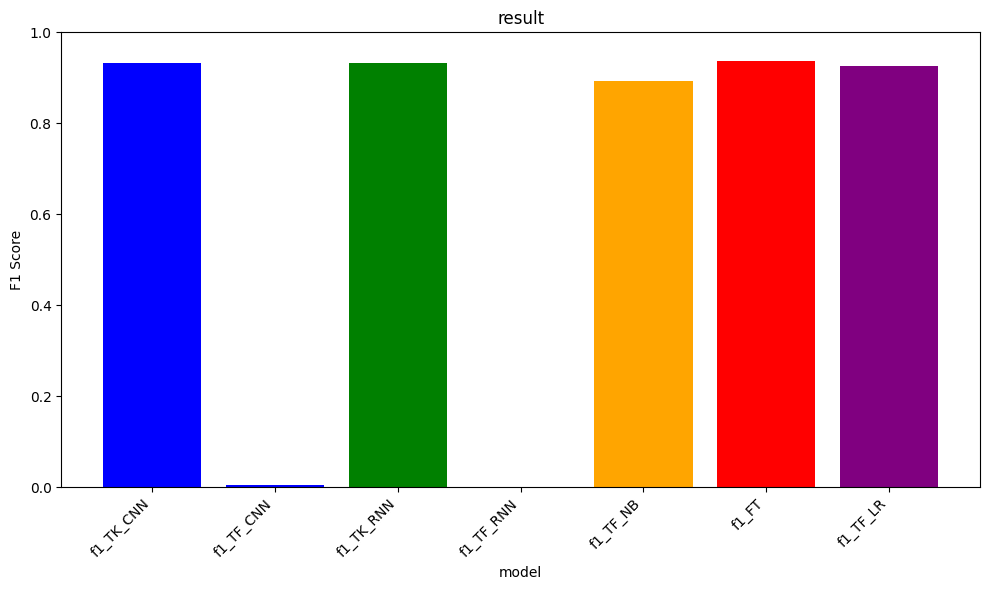

In [24]:
import matplotlib.pyplot as plt

models = ['f1_TK_CNN', 'f1_TF_CNN', 'f1_TK_RNN', 'f1_TF_RNN', 'f1_TF_NB', 'f1_FT', 'f1_TF_LR']
f1_scores = [0.9324, 0.0047, 0.9330, 0.0009, 0.8926, 0.9363, 0.9270]

# 그래프 크기 설정
plt.figure(figsize=(10,6))

# 막대그래프 그리기
plt.bar(models, f1_scores, color=['blue', 'blue', 'green', 'green', 'orange', 'red', 'purple'])

# 그래프 제목과 축 레이블 추가
plt.title('result')
plt.xlabel('model')
plt.ylabel('F1 Score')

# 그래프 출력
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

# 그래프 출력
plt.tight_layout()
plt.show()

# 메일함 정리

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras import backend as K
import numpy as np
import socket
import time

precision_metric = Precision()
recall_metric = Recall()

# F1-score 계산 함수
def f1_score(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)
    recall = recall_metric(y_true, y_pred)
    
    # F1-score 계산: 2 * (precision * recall) / (precision + recall)
    return 2 * (precision * recall) / (precision + recall + K.epsilon())


# 타임아웃이 발생할 경우 재시도
def search_with_retry(mail, search_condition, retries=3, delay=5):
    attempt = 0
    while attempt < retries:
        try:
            # 검색 조건을 UTF-8로 인코딩하여 바이트 형식으로 전달
            status, messages = mail.search(None, search_condition.encode('utf-8'))
            if status == "OK":
                return messages
            else:
                print("검색 실패. 다시 시도 중...")
                time.sleep(delay)
        except (imaplib.IMAP4.abort, socket.error) as e:
            print(f"IMAP 서버 오류 또는 네트워크 오류 발생: {e}. 재시도 중...")
            time.sleep(delay)
        attempt += 1
    raise Exception("검색에 실패했습니다. 재시도 횟수를 초과했습니다.")


# 텍스트 전처리
def predict_spam(subject):
    processed_subject = subject.lower()
    processed_subject = tokenizer.texts_to_sequences([processed_subject])
    
    # 시퀀스가 비어있는지 확인
    if len(processed_subject[0]) == 0:
        return 0
        
    # 패딩 적용
    processed_subject = pad_sequences(processed_subject, maxlen=19)
    
    # 예측
    prediction = model.predict(processed_subject)
    
    if prediction[0][0] > 0.5:
        return 1
    else:
        return 0


# 날짜변환 
def convert_date(date_str):
    month_map = {
        '01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr',
        '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug',
        '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'
    }

    # 날짜 입력 형식: 2022-01-31
    try:
        year, month, day = date_str.split('-')

        if len(year) != 4 or not year.isdigit():
            raise ValueError("잘못된 연도입니다.")

        if not month.isdigit() or int(month) not in range(1, 13):
            raise ValueError("잘못된 월입니다.")
        
        if len(day) != 2 or not day.isdigit() or not (1 <= int(day) <= 31):
            raise ValueError("잘못된 날짜입니다.")
        
        # 숫자 월을 영어로 변환
        month_name = month_map.get(month)
        if not month_name:
            raise ValueError("잘못된 월입니다.")

        # 변환된 날짜 반환
        return f"{day}-{month_name}-{year}"

    except ValueError as e:
        return f"오류: {e}"

    except Exception as e:
        return f"날짜 형식이 잘못되었습니다. {str(e)}"


# 메일함 선택
def select_search_condition():
    print("메일 검색 조건을 선택하세요:")
    print("1. 모든 메일 (ALL)")
    print("2. 읽지 않은 메일 (UNSEEN)")
    print("3. 최근 메일 (RECENT)")
    print("4. 읽은 메일 (SEEN)")
    print("5. 답장한 메일 (ANSWERED)")
    print("6. 삭제된 메일 (DELETED)")
    print("7. 초안 메일 (DRAFT)")
    print("8. 중요 표시된 메일 (FLAGGED)")
    print("9. 특정 날짜 이후 받은 메일 (SINCE)")
    print("10. 특정 날짜 이전 받은 메일 (BEFORE)")
    print("11. 특정 날짜에 받은 메일 (ON)")
    print("12. 본문에 특정단어가가 포함된 메일 (BODY)")

    while True:
        search_condition = input("검색 조건을 선택 (1~12): ")
        
        if search_condition == '1':
            print("모든 메일을 선택")
            return "ALL"
        elif search_condition == '2':
            print("읽지 않은 메일을 선택")
            return "UNSEEN"
        elif search_condition == '3':
            print("최근 메일을 선택")
            return "RECENT"
        elif search_condition == '4':
            print("읽은 메일을 선택")
            return "SEEN"
        elif search_condition == '5':
            print("답장한 메일을 선택")
            return "ANSWERED"
        elif search_condition == '6':
            print("삭제된 메일을 선택")
            return "DELETED"
        elif search_condition == '7':
            print("초안 메일을 선택")
            return "DRAFT"
        elif search_condition == '8':
            print("중요 표시된 메일을 선택")
            return "FLAGGED"
        elif search_condition == '9':
            data = input("날짜를 입력하세요 (예: 2022-01-31): ")
            formatted_date = convert_date(data)
            if "오류" in formatted_date:
                print(formatted_date)
                continue
            print(f'"{formatted_date}" 이후 받은 메일을 선택')
            return f'SINCE "{formatted_date}"'
        elif search_condition == '10':
            data = input("날짜를 입력하세요 (예: 2022-01-31): ")
            formatted_date = convert_date(data)
            if "오류" in formatted_date:
                print(formatted_date)
                continue
            print(f'"{formatted_date}" 이전 받은 메일을 선택')
            return f'BEFORE "{formatted_date}"'
        elif search_condition == '11':
            data = input("날짜를 입력하세요 (예: 2022-01-31): ")
            formatted_date = convert_date(data)
            if "오류" in formatted_date:
                print(formatted_date)
                continue
            print(f'"{formatted_date}"에 받은 메일을 선택')
            return f'ON "{formatted_date}"'
        elif search_condition == '12':
            data = input("특정단어를 입력하세요 : ")
            print(f'"{data}"가 포함된 메일을 선택')
            return f'BODY "{data}"'
        else:
            print("잘못된 입력입니다. 다시 입력하세요.")

    
# 메일 제목 디코딩
def safe_decode_header(header_value):
    decoded_parts = decode_header(header_value)
    decoded_string = ""

    for part, encoding in decoded_parts:
        if isinstance(part, bytes):
            try:
                if encoding == "cseuckr":
                    decoded_string += part.decode("euc-kr", errors="ignore")
                elif encoding == "unknown-8bit":
                    decoded_string += part.decode("utf-8", errors="ignore")
                else:
                    decoded_string += part.decode(encoding if encoding else "utf-8")
            except (UnicodeDecodeError, TypeError):
                print(f"디코딩 오류: {e}")
                decoded_string += part.decode("utf-8", errors="ignore")
        else:
            decoded_string += part

    return decoded_string


In [3]:
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from tensorflow.keras.models import load_model
import json

# 저장된 Tokenizer를 json 형식으로 불러오기
with open('tokenizer.json', 'r') as f:
    tokenizer_json = json.load(f)
    tokenizer = tokenizer_from_json(tokenizer_json)

# 학습된 모델 불러오기
model = load_model('best_model_TKRNN.keras', custom_objects={'f1_score': f1_score})
print(model)

<Sequential name=sequential, built=True>


In [41]:
# 모델 테스트
while(True) :
    subject = input("메일 제목을 입력하세요 (종료하려면 'exit' 입력): ")
    
    # 'exit'을 입력하면 종료
    if subject.lower() == 'exit':
        print("예측을 종료합니다.")
        break
    
    # 예측 실행
    result = predict_spam(subject)
    
    # 예측 결과 출력
    if result == 1:
        print("이 메일은 중요문서입니다.")
    else:
        print("이 메일은 쓰레기기입니다.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
이 메일은 중요문서입니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
이 메일은 중요문서입니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
이 메일은 쓰레기기입니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
이 메일은 쓰레기기입니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
이 메일은 중요문서입니다.
이 메일은 쓰레기기입니다.
예측을 종료합니다.


In [9]:
# IMAP 서버 및 메일 정보
imap_server_input = input("사용할 메일서비스명 (gmail, naver): ").strip().lower()

if imap_server_input == "gmail":
    imap_server = "imap.gmail.com"
    trash_folder = '"[Gmail]/Trash"'  # Gmail의 경우 휴지통 경로
elif imap_server_input == "naver":
    imap_server = "imap.naver.com"
    trash_folder = "Deleted Messages"  # 네이버의 경우 휴지통 경로
else:
    print("지원하지 않는 메일 서비스입니다.")
    exit()

email_user = input("계정 ID: ")
email_pass = input("password: ")

if '@' not in email_user:
    if imap_server_input == "gmail":
        email_user += '@gmail.com'
    else :
        email_user += '@naver.com'

    # 예측 결과 카운트
important_count = 0
spam_count = 0


        # IMAP 서버에 연결
mail = imaplib.IMAP4_SSL(imap_server, 993)
mail.login(email_user, email_pass)
mail.timeout = 30
print("로그인 성공!")


result, folders = mail.list()
print(folders)  # 모든 폴더 목록 출력

로그인 성공!
[b'(\\HasNoChildren \\Inbox) "/" "INBOX"', b'(\\HasNoChildren \\Sent) "/" "Sent Messages"', b'(\\HasNoChildren \\Drafts) "/" "Drafts"', b'(\\HasNoChildren \\Trash) "/" "Deleted Messages"', b'(\\HasNoChildren) "/" "&sLSsjMT0ulTHfNVo-"', b'(\\HasNoChildren) "/" "&zK2tbAC3rLDIHA-"', b'(\\HasNoChildren) "/" "&znTTmA-"', b'(\\HasNoChildren) "/" "SNS"', b'(\\HasNoChildren) "/" "&1QS4XLqowVg-"']


In [12]:
from email.header import decode_header
import numpy as np
import imaplib
import email
import csv

try:
    # IMAP 서버 및 메일 정보
    imap_server_input = input("사용할 메일서비스명 (gmail, naver): ").strip().lower()

    if imap_server_input == "gmail":
        imap_server = "imap.gmail.com"
        trash_folder = '"[Gmail]/Trash"'  # Gmail의 경우 휴지통 경로
    elif imap_server_input == "naver":
        imap_server = "imap.naver.com"
        trash_folder = "Trash"  # 네이버의 경우 휴지통 경로
    else:
        print("지원하지 않는 메일 서비스입니다.")
        exit()

    email_user = input("계정 ID: ")
    email_pass = input("password: ")

    if '@' not in email_user:
        if imap_server_input == "gmail":
            email_user += '@gmail.com'
        else :
            email_user += '@naver.com'

    # 예측 결과 카운트
    important_count = 0
    spam_count = 0

    try:
        # IMAP 서버에 연결
        mail = imaplib.IMAP4_SSL(imap_server, 993)
        mail.login(email_user, email_pass)
        mail.timeout = 30
        print("로그인 성공!")

        # IMAP 서버에서 메일 제목 가져오기
        if input("ㄱㄱ?: ") == 'ㄱㄱ':
            
            # 받은 편지함 선택
            mail.select("inbox")

            # 조건에 맞는 메일 검색
            search_condition = select_search_condition()
            try:
                messages = search_with_retry(mail, search_condition)
                message_ids = messages[0].split()

                # 메일 제목 가져오기
                for index, msg_id in enumerate(message_ids, start=1):
                    print(f"{index}/{len(message_ids)} 번째 메일 처리 중...")

                    # 메일 가져오기
                    status, msg_data = mail.fetch(msg_id, "(RFC822)")
                    for response_part in msg_data:
                        if isinstance(response_part, tuple):
                            msg = email.message_from_bytes(response_part[1])
                            
                            # 메일 제목 디코딩
                            subject = safe_decode_header(msg["Subject"])

                            # 예측 실행
                            prediction = predict_spam(subject)

                            # 메일을 휴지통으로 이동시키기
                            if prediction == 0:
                                spam_count += 1
                                if imap_server_input == "gmail":
                                    mail.store(msg_id, '+X-GM-LABELS', trash_folder)
                                else :
                                    mail.store(msg_id, '+FLAGS', '\\Deleted')
                                print(f"메일 {index}번을 휴지통으로 이동시킴.")
                            else:
                                important_count += 1

                print(f"중요 메일 {important_count}개 확인됨.")
                print(f"스팸 메일 {spam_count}개 이동됨.")

            except Exception as e:
                print(f"오류: {e}")


            if input("원상복구 ㄱㄱ?: ") == 'ㄱㄱ':
                # 휴지통 폴더 선택
                mail.select(trash_folder)

                try:
                    # 휴지통에서 모든 메일 검색
                    messages = search_with_retry(mail, "ALL")
                    message_ids = messages[0].split()


                    # 휴지통에 있는 모든 메일 복구
                    for msg_id in message_ids:
                        # 메일을 받은 편지함으로 복구
                        if imap_server_input == "gmail":
                            mail.store(msg_id, '-X-GM-LABELS', trash_folder)
                            mail.store(msg_id, '+X-GM-LABELS', 'INBOX')
                        else :
                            mail.store(msg_id, '-FLAGS', '\\Deleted')
                            mail.store(msg_id, '+FLAGS', '\\Seen')

                        print(f"메일 {msg_id}을(를) 받은편지함으로 복구했습니다.")

                except Exception as e:
                    print(f"검색 실패: {e}")
            
            # IMAP 서버에서 로그아웃
            mail.expunge()
            mail.close()
            mail.logout()

    except imaplib.IMAP4.error as e:
        print(f"IMAP 로그인 실패: {e}")
        
except KeyboardInterrupt:
    print("\n프로그램이 사용자의 요청으로 종료되었습니다.")

로그인 성공!
메일 검색 조건을 선택하세요:
1. 모든 메일 (ALL)
2. 읽지 않은 메일 (UNSEEN)
3. 최근 메일 (RECENT)
4. 읽은 메일 (SEEN)
5. 답장한 메일 (ANSWERED)
6. 삭제된 메일 (DELETED)
7. 초안 메일 (DRAFT)
8. 중요 표시된 메일 (FLAGGED)
9. 특정 날짜 이후 받은 메일 (SINCE)
10. 특정 날짜 이전 받은 메일 (BEFORE)
11. 특정 날짜에 받은 메일 (ON)
12. 본문에 특정단어가가 포함된 메일 (BODY)
"01-Jan-2025" 이후 받은 메일을 선택
1/3 번째 메일 처리 중...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/3 번째 메일 처리 중...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
메일 2번을 휴지통으로 이동시킴.
3/3 번째 메일 처리 중...
중요 메일 1개 확인됨.
스팸 메일 1개 이동됨.
